In [17]:
import torch
from torchvision import datasets,transforms
import os
import numpy as np
import time
import scipy.io as io
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import copy
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def funcL(x):
    y = 0.5*np.power(6*x-2,2)*np.sin(12*x-4) + 10*(x-0.5) - 5
    return y

def funcH(x):
    y = np.power(6*x-2,2)*np.sin(12*x-4)
    return y

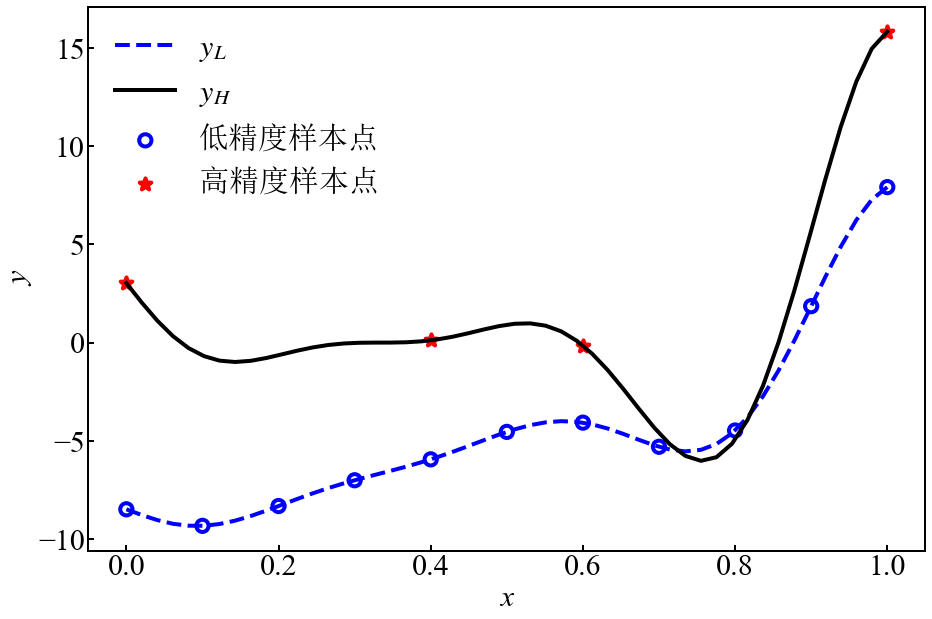

In [15]:
a = np.linspace(0,1,50)
b = funcL(a)
c = funcH(a)

xL = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
yL = funcL(xL)
xH = np.array([0, 0.4, 0.6,1])
yH = funcH(xH)

fig, ax = plt.subplots(1,1,figsize=(15,10))
config = {
    "font.family":'serif',
    "font.size": 30,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
font1={'family':'Times New Roman',
    'weight':'normal',
    'style':'italic',
    'fontsize':30
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(width=2,length=6)

plt.plot(a,b,color='b',linestyle='--',linewidth=4)
plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='b',s=150,linewidth=4)
plt.plot(a,c,color='k',linewidth=4)
plt.scatter(xH,yH,marker='*',color='r',s=150,linewidth=4)
legend = plt.legend([r"$y_L$",r"$y_H$","低精度样本点","高精度样本点"],frameon=False)
# legend.get_frame().set_linewidth(2)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1],font="Times New Roman", fontsize = 30)
plt.yticks([-10,-5,0,5,10,15],font="Times New Roman", fontsize = 30)
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
plt.savefig("E:/graduation_project/论文/图/图4-1.png",dpi=600,bbox_inches = 'tight')
plt.show()

In [4]:
# a = np.linspace(0,1,50)
# b = funcL(a)
# c = funcH(a)

# xL = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# yL = funcL(xL)
# xH = np.array([0, 0.4, 0.6,1])
# yH = funcH(xH)

# fig = plt.figure(figsize=(15,10))
# font1={'family':'Times New Roman',
#     'weight':'normal',
#     'style':'italic',
#     'fontsize':20
# }
# plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
# plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
# plt.plot(a,b,color='b',linestyle='--',linewidth=3)
# plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='b',s=120,linewidth=3)
# plt.plot(a,c,color='k',linewidth=3)
# plt.scatter(xH,yH,marker='*',color='r',s=120,linewidth=3)
# plt.legend([r"$y_L$",r"$y_H$","低精度样本点","高精度样本点"],prop={'family':'STZhongSong','weight':'normal','style':'italic','size':20})
# plt.xticks([0.0,0.2,0.4,0.6,0.8,1],font="Times New Roman", fontsize = 18)
# plt.yticks([-10,-5,0,5,10,15],font="Times New Roman", fontsize = 18)
# plt.xlabel("x",fontdict=font1)
# plt.ylabel("y",fontdict=font1)
# # plt.savefig("E:/graduation_project/论文/图/图4-1.png",dpi=600,bbox_inches = 'tight')
# plt.show()

# 方法一

In [5]:
xL = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.4, 0.6,1]).reshape((-1,1))
yH = funcH(xH)
high_idx = [0,4,6,10]

x_train = xL
y_train_low = yL
y_train_high = np.zeros_like(y_train_low)
y_train_high[:,:] = y_train_low
y_train_high[high_idx] = yH

beta_train = np.ones_like(x_train)*1e-5
beta_train[high_idx] = 2

print(yL)
print(yH)
print(x_train)
print(y_train_low)
print(y_train_high)
print(beta_train)

[[-8.48639501]
 [-9.32828839]
 [-8.31986355]
 [-7.00778837]
 [-5.94261151]
 [-4.54535129]
 [-4.0747189 ]
 [-5.30287702]
 [-4.47456522]
 [ 1.85597517]
 [ 7.91486597]]
[[ 3.02720998]
 [ 0.11477697]
 [-0.14943781]
 [15.82973195]]
[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
[[-8.48639501]
 [-9.32828839]
 [-8.31986355]
 [-7.00778837]
 [-5.94261151]
 [-4.54535129]
 [-4.0747189 ]
 [-5.30287702]
 [-4.47456522]
 [ 1.85597517]
 [ 7.91486597]]
[[ 3.02720998]
 [-9.32828839]
 [-8.31986355]
 [-7.00778837]
 [ 0.11477697]
 [-4.54535129]
 [-0.14943781]
 [-5.30287702]
 [-4.47456522]
 [ 1.85597517]
 [15.82973195]]
[[2.e+00]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [2.e+00]
 [1.e-05]
 [2.e+00]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [2.e+00]]


In [6]:
batchsize = 11
x_train = torch.from_numpy(x_train).float()
y_train_low = torch.from_numpy(y_train_low).float()
y_train_high = torch.from_numpy(y_train_high).float()
beta_train = torch.from_numpy(beta_train).float()

train_data = torch.utils.data.TensorDataset(x_train, y_train_low, y_train_high, beta_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batchsize, shuffle=True)  

In [7]:
# 自定义损失函数
class MFMSELoss(torch.nn.Module):
    def __init__(self, gamma):
        super(MFMSELoss, self).__init__()
        self.gamma = gamma

    def forward(self, output_low, output_high, beta, target_low, target_high):
        loss = torch.mean(torch.pow(output_low - target_low, 2) * 0.5 * self.gamma + \
                          torch.pow(output_high - target_high, 2) * beta * (1 - self.gamma))
        return loss

In [8]:
class MFModel(torch.nn.Module):
    def __init__(self,init_weights=False):
        super(MFModel, self).__init__()
        # alpha1 = torch.ones(1, requires_grad=True)
        # alpha2 = torch.ones(1, requires_grad=True)
        alpha = torch.tensor([1.0], requires_grad=False)
        self.alpha = torch.nn.Parameter(alpha).requires_grad_(False)
        # self.alpha2 = torch.nn.Parameter(alpha2)
        # self.alpha = alpha
        self.fully1 = torch.nn.Sequential(
            torch.nn.Linear(1,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,1),
        )

        self.fully2 = torch.nn.Sequential(
            torch.nn.Linear(2,10),
            torch.nn.Linear(10,1),
        )

        self.fully3 = torch.nn.Sequential(
            torch.nn.Linear(2,10),
            torch.nn.Tanh(),
            torch.nn.Linear(10,10),
            torch.nn.Tanh(),
            torch.nn.Linear(10,1),
        )

        if init_weights:
            self._initialize_weights()

    def forward(self,x):
        x1 = self.fully1(x)
        x2 = torch.cat((x1, x), dim=1)
        x3 = self.fully2(x2)
        x4 = self.fully3(x2)
        x5 = self.alpha * x3 + (1-self.alpha) * x4
        # x5 = self.alpha1 * x3 + self.alpha2 * x4
        return x1, x5

    def _initialize_weights(self):
        for m in self.modules():
            print(m)
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

In [9]:
model = MFModel(init_weights=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)
loss_f1 = MFMSELoss(0.6)
loss_f2 = torch.nn.MSELoss()
loss_f3 = torch.nn.L1Loss()
# optimizer = torch.optim.LBFGS(filter(lambda p: p.requires_grad, model.parameters()),lr=0.001)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=0.001)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=10)

MFModel(
  (fully1): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
  (fully2): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=1, bias=True)
  )
  (fully3): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Tanh()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)
Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=1, bias=True)
)
Linear(in_features=1, out_features=20, bias=True)
Tanh()
Linear(in_features=20, out_features=20, bias=True)
Tanh()
Linear(in_features=20, out_features=1,

In [10]:
class EarlyStopping(object):
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, savepath='finish_example1.pth'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            上次验证集损失值改善后等待几个epoch
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            如果是True，为每个验证集损失值改善打印一条信息
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            监测数量的最小变化，以符合改进的要求
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.savepath = savepath

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''
        Saves model when validation loss decrease.
        验证损失减少时保存模型。
        '''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        # torch.save(model.state_dict(), 'checkpoint.pt')     # 这里会存储迄今最优模型的参数
        torch.save(model, self.savepath)                 # 这里会存储迄今最优的模型
        self.val_loss_min = val_loss

In [11]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,"finish_example1.pth")
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    model.train()
    for Data in train_loader:
        X, y_low, y_high, beta = Data
        X, y_low, y_high, beta = X.to(device), y_low.to(device), y_high.to(device), beta.to(device)
        y_pred_low, y_pred_high = model(X)
        loss = loss_f1(y_pred_low, y_pred_high, beta, y_low, y_high)
        optimizer.zero_grad()
        loss.backward()

        # def closure():
        #     optimizer.zero_grad()
        #     loss = loss_f1(y_pred_low, y_pred_high, beta, y_low, y_high)
        #     return loss

        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

print("Total time: ", time.time() - time0)

Total time:  47.742560625076294


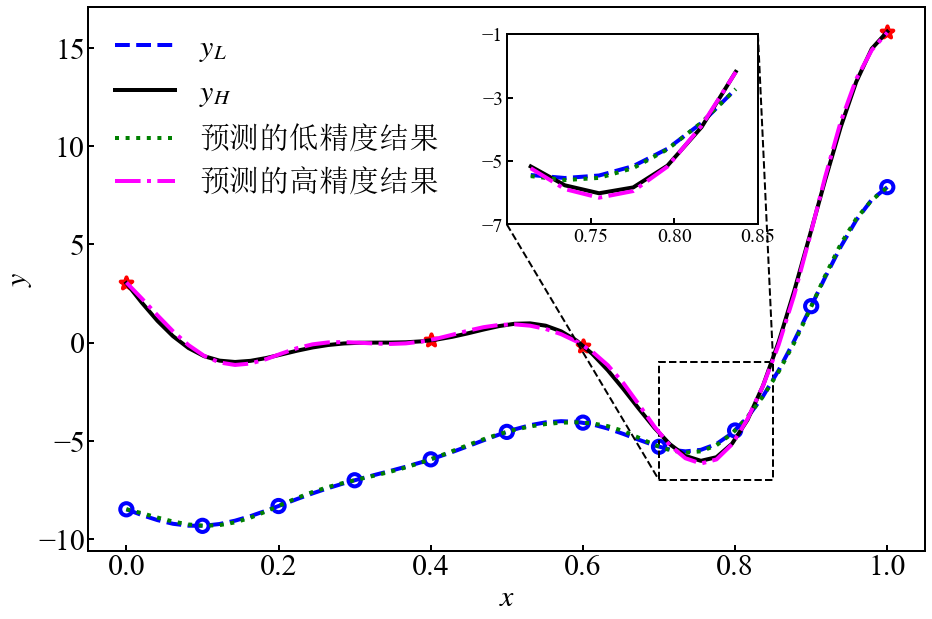

In [45]:
a = np.linspace(0,1,50).reshape((-1,1))
b = funcL(a)
c = funcH(a)
num = len(a)

xL = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.4, 0.6,1]).reshape((-1,1))
yH = funcH(xH)

model.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_low, y_pred_high = model(x_test)

fig, ax = plt.subplots(1,1,figsize=(15,10))
config = {
    "font.family":'serif',
    "font.size": 30,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
font1={'family':'Times New Roman',
    'weight':'normal',
    'style':'italic',
    'fontsize':30
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(width=2,length=6)

plt.plot(a,b,color='b',linestyle='--',linewidth=4)
plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='b',s=150,linewidth=4)
plt.plot(a,c,color='k',linewidth=4)
plt.scatter(xH,yH,marker='*',color='r',s=150,linewidth=4)
plt.plot(a,y_pred_low.detach().cpu().numpy(),color='g',linestyle=':',linewidth=4)
plt.plot(a,y_pred_high.detach().cpu().numpy(),color='fuchsia',linestyle='-.',linewidth=4)
plt.legend([r"$y_L$",r"$y_H$","预测的低精度结果","预测的高精度结果"],frameon=False)
plt.xticks([0,0.2,0.4,0.6,0.8,1],font='Times New Roman',fontsize=30)
plt.yticks([-10,-5,0,5,10,15],font='Times New Roman',fontsize=30)
plt.xlabel(r"$x$",fontdict=font1)
plt.ylabel(r"$y$",fontdict=font1)

axins = ax.inset_axes((0.5, 0.6, 0.3, 0.35))
axins.plot(a[int(num*0.7):int(num*0.85)],b[int(num*0.7):int(num*0.85)],color='b',linestyle='--',linewidth=4)
axins.plot(a[int(num*0.7):int(num*0.85)],c[int(num*0.7):int(num*0.85)],color='k',linewidth=4)
axins.plot(a[int(num*0.7):int(num*0.85)],y_pred_low.detach().cpu().numpy()[int(num*0.7):int(num*0.85)],color='g',linestyle=':',linewidth=4)
axins.plot(a[int(num*0.7):int(num*0.85)],y_pred_high.detach().cpu().numpy()[int(num*0.7):int(num*0.85)],color='fuchsia',linestyle='-.',linewidth=4)
axins.set_xlim(0.7, 0.85)
axins.set_ylim(-7, -1)
axins.set_xticks([0.75,0.8,0.85])
axins.set_yticks([-7,-5,-3,-1])
axins.tick_params(labelsize=20)
labels = axins.get_xticklabels() + axins.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
axins.spines['left'].set_linewidth(2)
axins.spines['top'].set_linewidth(2)
axins.spines['right'].set_linewidth(2)
axins.spines['bottom'].set_linewidth(2)
axins.tick_params(width=2,length=6)
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec='k', lw=2, linestyle='--')

plt.savefig("E:/graduation_project/论文/图/图4-1-2.png",dpi=600,bbox_inches = 'tight')
plt.show()

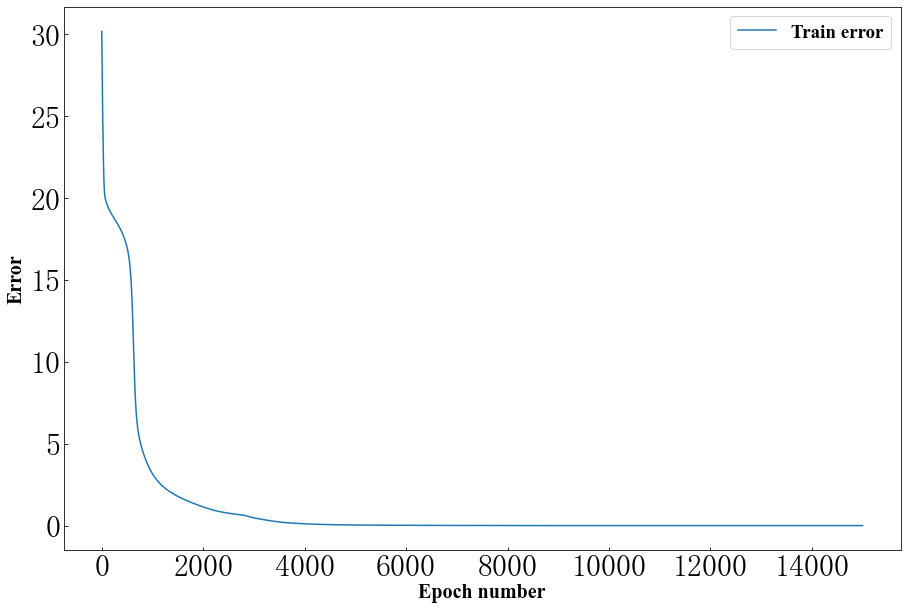

In [46]:
Epoch = list(range(1,len(Train_loss)+1))
fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(Epoch,Train_loss)
plt.legend(["Train error",],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("Epoch number",fontdict=font1)
plt.ylabel("Error",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

# 加法标度

In [47]:
xL = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.4, 0.6,1]).reshape((-1,1))
yH = funcH(xH)
high_idx = [0,4,6,10]

x_train_low = xL
y_train_low = yL
x_train_diff = xH
y_train_diff = yH - 2*yL[high_idx]

print(yL)
print(yH)
print(x_train_low)
print(y_train_low)
print(x_train_diff)
print(y_train_diff)

[[-8.48639501]
 [-9.32828839]
 [-8.31986355]
 [-7.00778837]
 [-5.94261151]
 [-4.54535129]
 [-4.0747189 ]
 [-5.30287702]
 [-4.47456522]
 [ 1.85597517]
 [ 7.91486597]]
[[ 3.02720998]
 [ 0.11477697]
 [-0.14943781]
 [15.82973195]]
[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
[[-8.48639501]
 [-9.32828839]
 [-8.31986355]
 [-7.00778837]
 [-5.94261151]
 [-4.54535129]
 [-4.0747189 ]
 [-5.30287702]
 [-4.47456522]
 [ 1.85597517]
 [ 7.91486597]]
[[0. ]
 [0.4]
 [0.6]
 [1. ]]
[[ 2.00000000e+01]
 [ 1.20000000e+01]
 [ 8.00000000e+00]
 [-1.77635684e-15]]


In [48]:
x_train_low = torch.from_numpy(x_train_low).float()
y_train_low = torch.from_numpy(y_train_low).float()

x_train_diff = torch.from_numpy(x_train_diff).float()
y_train_diff = torch.from_numpy(y_train_diff).float()

low_train_data = torch.utils.data.TensorDataset(x_train_low, y_train_low)
diff_train_data = torch.utils.data.TensorDataset(x_train_diff, y_train_diff)

low_train_loader = torch.utils.data.DataLoader(low_train_data, batch_size=len(x_train_low), shuffle=True)  
diff_train_loader = torch.utils.data.DataLoader(diff_train_data, batch_size=len(x_train_diff), shuffle=True)  

In [5]:
class ADDModel(torch.nn.Module):
    def __init__(self,init_weights=False):
        super(ADDModel, self).__init__()
        self.fully = torch.nn.Sequential(
            torch.nn.Linear(1,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,1),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self,x):
        x = self.fully(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            print(m)
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

In [6]:
low_model = ADDModel(init_weights=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
low_model.to(device)
loss_f = torch.nn.MSELoss()
loss_f1 = torch.nn.L1Loss()
optimizer = torch.optim.Adam(low_model.parameters(),lr=0.001)

ADDModel(
  (fully): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): Tanh()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)
Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): Tanh()
  (6): Linear(in_features=20, out_features=20, bias=True)
  (7): Tanh()
  (8): Linear(in_features=20, out_features=1, bias=True)
)
Linear(in_features=1, out_features=20, bias=True)
Tanh()
Linear(in_features=20, out_features=20, bias=True)
Tanh()
Linear(in_features=20, out_features=20, bias=True)
Tanh()
Linear(in_features=20, out_features=20, bias=True)
Tanh()
Linear(in_

In [7]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,'finish_LowMLP.pth')
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    low_model.train()

    for Data in low_train_loader:
        X, y_low = Data
        X, y_low = X.to(device), y_low.to(device)
        y_pred_low = low_model(X)
        loss = loss_f(y_pred_low, y_low)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(low_train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()

print("Total time: ", time.time() - time0)

Total time:  28.333523750305176


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


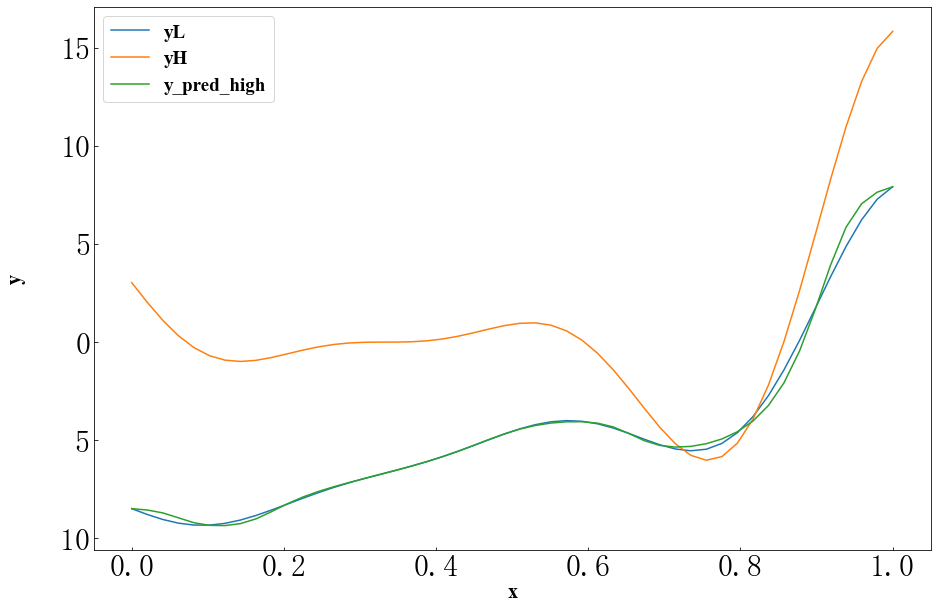

In [54]:
a = np.linspace(0,1,50).reshape((-1,1))
b = funcL(a)
c = funcH(a)
low_model.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_low = low_model(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_low.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_high"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

In [55]:
diff_model = ADDModel()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
diff_model.to(device)
loss_f = torch.nn.MSELoss()
loss_f1 = torch.nn.L1Loss()

cuda:0


In [56]:
optimizer = torch.optim.Adam(diff_model.parameters(),lr=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=10)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=50,gamma=0.9,last_epoch=-1)

In [57]:
epoch_n = 15000
diff_Train_loss = []
diff_Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,'finish_DiffMLP.pth')
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    diff_model.train()

    for Data in diff_train_loader:
        X, y_diff = Data
        X, y_diff = X.to(device), y_diff.to(device)
        y_pred_diff = diff_model(X)
        loss = loss_f(y_pred_diff, y_diff)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(diff_train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    diff_Train_time.append(time2-time1)
    diff_Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()
    
print("Total time: ", time.time() - time0)

Total time:  27.247016191482544


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


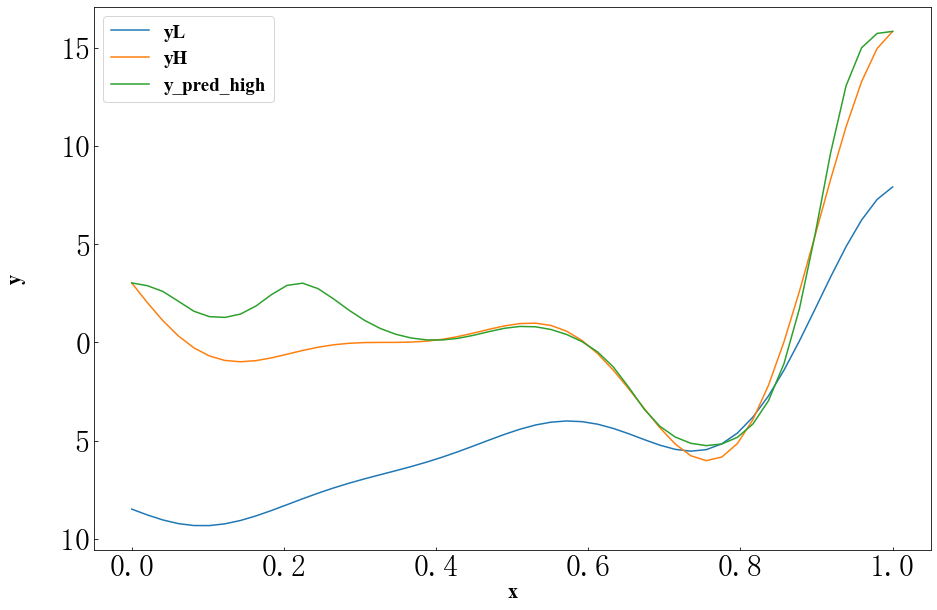

In [58]:
a = np.linspace(0,1,50).reshape((-1,1))
b = funcL(a)
c = funcH(a)
low_model.eval()
diff_model.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_high = 2*low_model(x_test) + diff_model(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_high.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_high"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

# 迁移学习

In [59]:
xL = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.4, 0.6,1]).reshape((-1,1))
yH = funcH(xH)
high_idx = [0,4,6,10]

x_train_low = xL
y_train_low = yL
x_train_high = xH
y_train_high = yH

print(yL)
print(yH)

[[-8.48639501]
 [-9.32828839]
 [-8.31986355]
 [-7.00778837]
 [-5.94261151]
 [-4.54535129]
 [-4.0747189 ]
 [-5.30287702]
 [-4.47456522]
 [ 1.85597517]
 [ 7.91486597]]
[[ 3.02720998]
 [ 0.11477697]
 [-0.14943781]
 [15.82973195]]


In [60]:
x_train_low = torch.from_numpy(x_train_low).float()
y_train_low = torch.from_numpy(y_train_low).float()

x_train_high = torch.from_numpy(x_train_high).float()
y_train_high = torch.from_numpy(y_train_high).float()

low_train_data = torch.utils.data.TensorDataset(x_train_low, y_train_low)
high_train_data = torch.utils.data.TensorDataset(x_train_high, y_train_high)

low_train_loader = torch.utils.data.DataLoader(low_train_data, batch_size=len(x_train_low), shuffle=True,drop_last=True)  
high_train_loader = torch.utils.data.DataLoader(high_train_data, batch_size=len(x_train_high), shuffle=True, drop_last=True)  

In [61]:
class TRModel(torch.nn.Module):
    def __init__(self,init_weights=False):
        super(TRModel, self).__init__()
        self.fully = torch.nn.Sequential(
            torch.nn.Linear(1,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,1),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self,x):
        x = self.fully(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            print(m)
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

In [62]:
TRmodel = TRModel()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
TRmodel.to(device)
loss_f = torch.nn.MSELoss()
loss_f1 = torch.nn.L1Loss()
optimizer = torch.optim.Adam(TRmodel.parameters(),lr=0.001)

cuda:0


In [63]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,'finish_LowMLP.pth')
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    TRmodel.train()

    for Data in low_train_loader:
        X, y_low = Data
        X, y_low = X.to(device), y_low.to(device)
        y_pred_low = TRmodel(X)
        loss = loss_f(y_pred_low, y_low)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(low_train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()
    
print("Total time: ", time.time() - time0)

Total time:  28.19629168510437


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


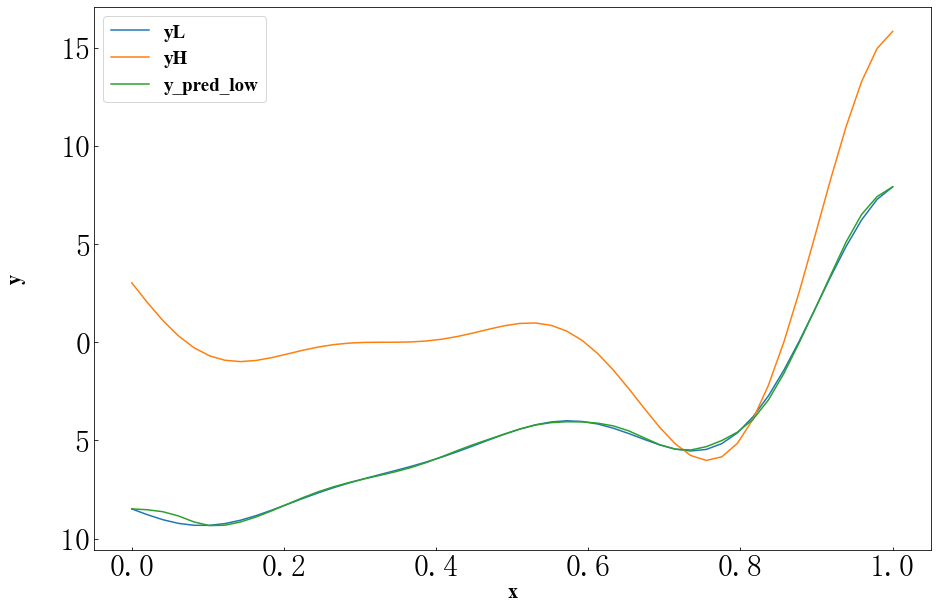

In [64]:
a = np.linspace(0,1,50).reshape((-1,1))
b = funcL(a)
c = funcH(a)
TRmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_low = TRmodel(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_low.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_low"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

In [65]:
optimizer = torch.optim.Adam(TRmodel.parameters(),lr=0.0001)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=10)

In [66]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,'finish_TRMLP.pth')
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    TRmodel.train()

    for Data in high_train_loader:
        X, y_high = Data
        X, y_high = X.to(device), y_high.to(device)
        y_pred_high = TRmodel(X)
        loss = loss_f(y_pred_high, y_high)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0]
    train_loss = running_loss/len(high_train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()

print("Total time: ", time.time() - time0)

Total time:  26.94382119178772


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


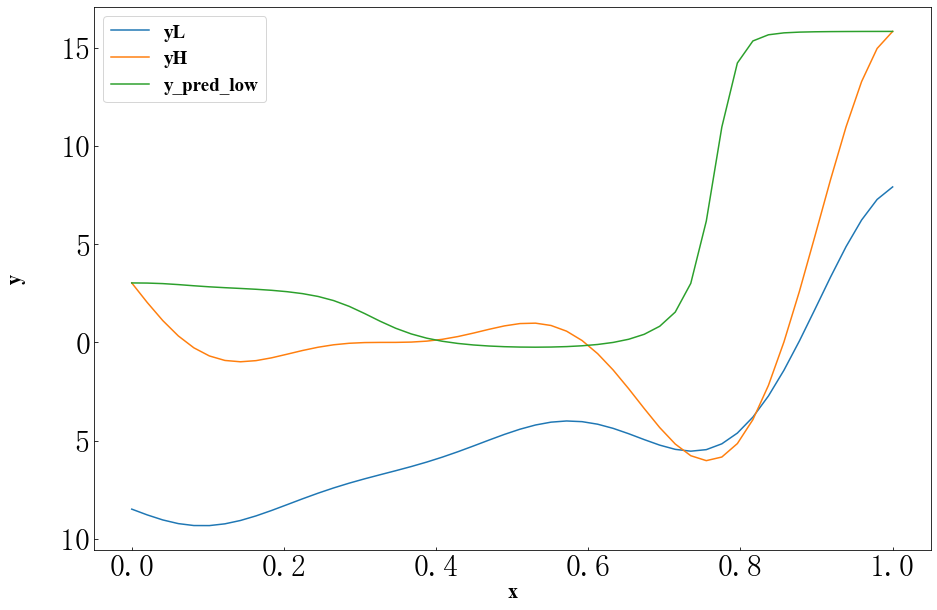

In [67]:
a = np.linspace(0,1,50).reshape((-1,1))
b = funcL(a)
c = funcH(a)
TRmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_low = TRmodel(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_low.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_low"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

# only high fidelity

In [68]:
xH = np.array([0, 0.4, 0.6,1]).reshape((-1,1))
yH = funcH(xH)

x_train = xH
y_train_high = yH

print(x_train)
print(y_train_high)

[[0. ]
 [0.4]
 [0.6]
 [1. ]]
[[ 3.02720998]
 [ 0.11477697]
 [-0.14943781]
 [15.82973195]]


In [69]:
x_train = torch.from_numpy(x_train).float()
y_train_high = torch.from_numpy(y_train_high).float()

train_data = torch.utils.data.TensorDataset(x_train, y_train_high)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=len(x_train), shuffle=True, drop_last=True)  

In [70]:
class HModel(torch.nn.Module):
    def __init__(self,init_weights=False):
        super(HModel, self).__init__()
        self.fully = torch.nn.Sequential(
            torch.nn.Linear(1,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,20),
            torch.nn.Tanh(),
            torch.nn.Linear(20,1),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self,x):
        x = self.fully(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            print(m)
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)

In [71]:
Hmodel = HModel()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
Hmodel.to(device)
loss_f = torch.nn.MSELoss()
loss_f1 = torch.nn.L1Loss()
optimizer = torch.optim.Adam(Hmodel.parameters(),lr=0.001)

cuda:0


In [72]:
epoch_n = 15000
Train_loss = []
Train_time = []
time0 = time.time()
# early_stopping = EarlyStopping(50,True,0,"finish_HMLP.pth")
for epoch in range(epoch_n):
    # print("Epoch{}/{}".format(epoch+1,epoch_n))
    # print("-"*10)
    running_loss = 0
    time1 = time.time()
    Hmodel.train()

    for Data in train_loader:
        X, y_high = Data
        X, y_high = X.to(device), y_high.to(device)
        y_pred_high = Hmodel(X)
        loss = loss_f(y_pred_high, y_high)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*X.shape[0] 
    train_loss = running_loss/len(train_data)
    # print("Train Loss:{:.10f}".format(train_loss))
    time2 = time.time()
    Train_time.append(time2-time1)
    Train_loss.append(train_loss)

    valid_loss1 = 0
    time3 = time.time()
   
print("Total time: ", time.time() - time0)

Total time:  27.938963890075684


D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


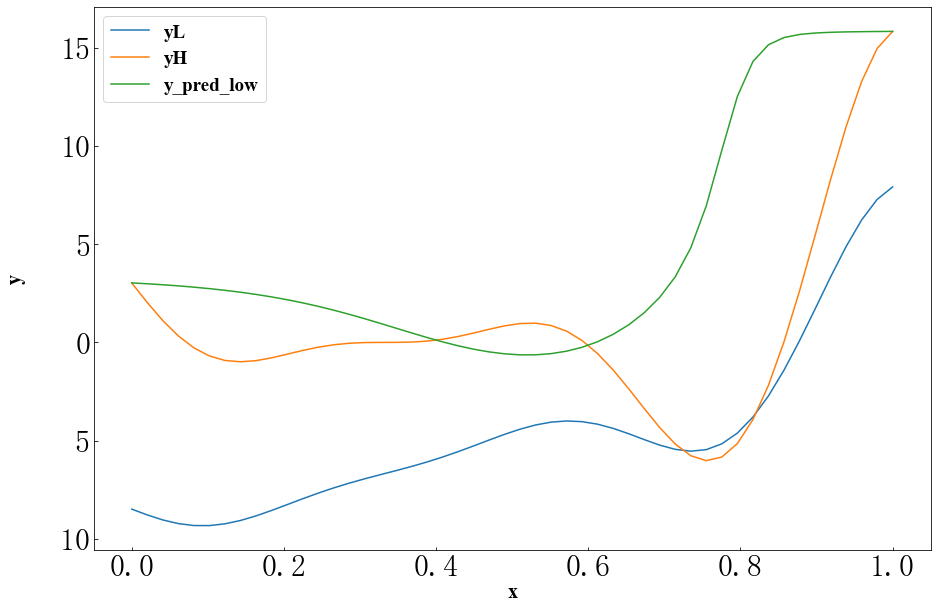

In [73]:
a = np.linspace(0,1,50).reshape((-1,1))
b = funcL(a)
c = funcH(a)
Hmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred_high = Hmodel(x_test)

fig = plt.figure(figsize=(15,10))
font1={'family':'Times New Roman',
    'weight':'bold',
      'size':20
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,y_pred_high.detach().cpu().numpy())
plt.legend(["yL","yH","y_pred_low"],prop={'family':'Times New Roman','weight':'bold','size':19})
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font1)
# plt.savefig("./loss.png",dpi=600,bbox_inches = 'tight')
plt.show()

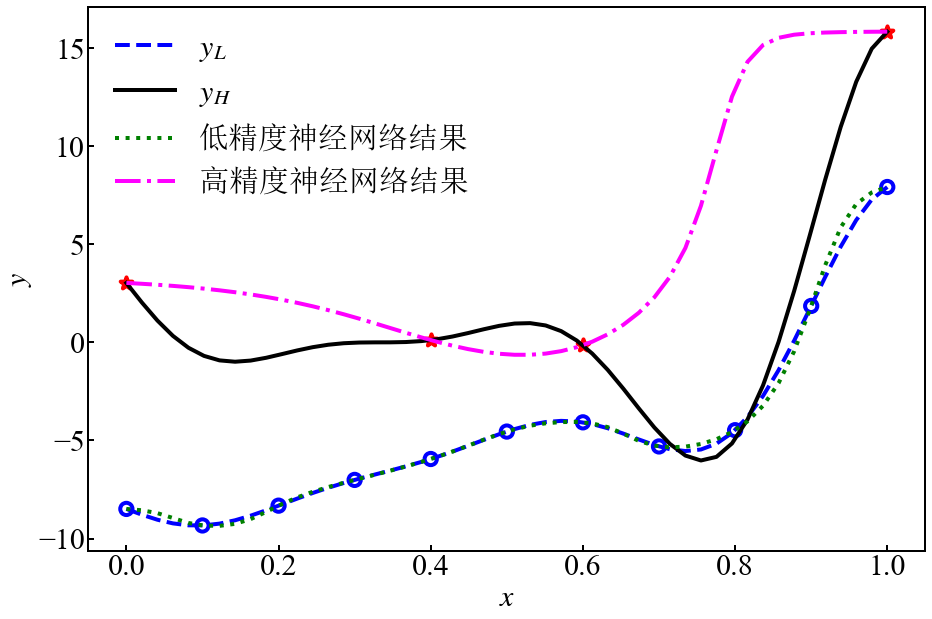

In [80]:
a = np.linspace(0,1,50).reshape((-1,1))
b = funcL(a)
c = funcH(a)

xL = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.4, 0.6,1]).reshape((-1,1))
yH = funcH(xH)

low_model.eval()
Hmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred1 = low_model(x_test)
y_pred2 = Hmodel(x_test)

fig, ax = plt.subplots(1,1,figsize=(15,10))
config = {
    "font.family":'serif',
    "font.size": 30,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
font1={'family':'Times New Roman',
    'weight':'normal',
    'style':'italic',
    'fontsize':30
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(width=2,length=6)

plt.plot(a,b,color='b',linestyle='--',linewidth=4)
plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='b',s=150,linewidth=4)
plt.plot(a,c,color='k',linewidth=4)
plt.scatter(xH,yH,marker='*',color='r',s=150,linewidth=4)
plt.plot(a,y_pred1.detach().cpu().numpy(),color='g',linestyle=':',linewidth=4)
plt.plot(a,y_pred2.detach().cpu().numpy(),color='fuchsia',linestyle='-.',linewidth=4)
plt.legend([r"$y_L$",r"$y_H$","低精度神经网络结果","高精度神经网络结果"],frameon=False)
plt.xticks([0,0.2,0.4,0.6,0.8,1],font='Times New Roman',fontsize=30)
plt.yticks([-10,-5,0,5,10,15],font='Times New Roman',fontsize=30)
plt.xlabel(r"$x$",fontdict=font1)
plt.ylabel(r"$y$",fontdict=font1)
plt.savefig("E:/graduation_project/论文/图/图4-1-3.png",dpi=600,bbox_inches = 'tight')
plt.show()

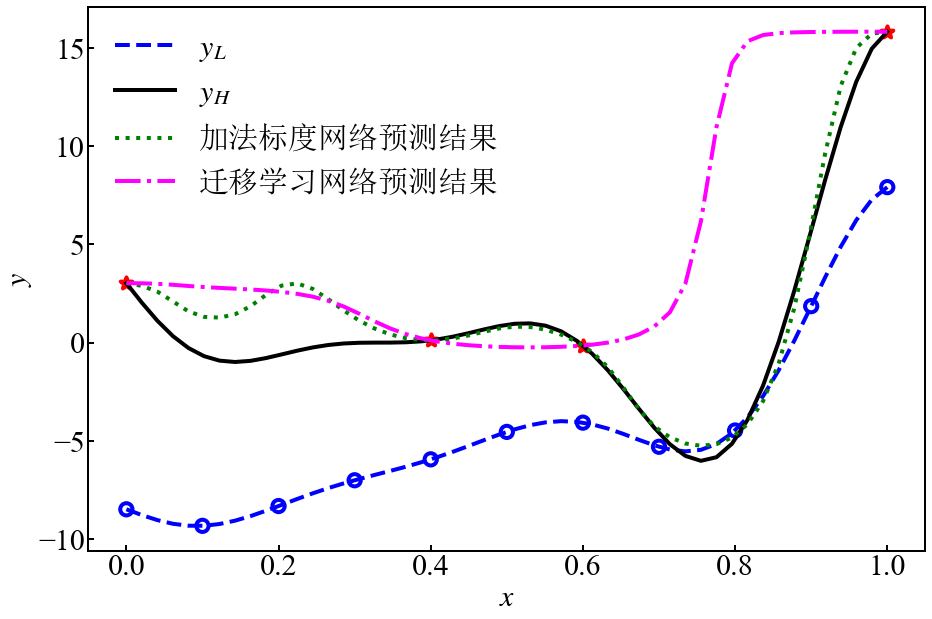

In [82]:
a = np.linspace(0,1,50).reshape((-1,1))
b = funcL(a)
c = funcH(a)

xL = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).reshape((-1,1))
yL = funcL(xL)
xH = np.array([0, 0.4, 0.6,1]).reshape((-1,1))
yH = funcH(xH)

low_model.eval()
diff_model.eval()
TRmodel.eval()
x_test = torch.from_numpy(a).float().to(device)
y_pred3 = 2*low_model(x_test) + diff_model(x_test)
y_pred4 = TRmodel(x_test)

fig, ax = plt.subplots(1,1,figsize=(15,10))
config = {
    "font.family":'serif',
    "font.size": 30,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
font1={'family':'Times New Roman',
    'weight':'normal',
    'style':'italic',
    'fontsize':30
}
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(width=2,length=6)

plt.plot(a,b,color='b',linestyle='--',linewidth=4)
plt.scatter(xL,yL,marker='o',facecolor='none',edgecolor='b',s=150,linewidth=4)
plt.plot(a,c,color='k',linewidth=4)
plt.scatter(xH,yH,marker='*',color='r',s=150,linewidth=4)
plt.plot(a,y_pred3.detach().cpu().numpy(),color='g',linestyle=':',linewidth=4)
plt.plot(a,y_pred4.detach().cpu().numpy(),color='fuchsia',linestyle='-.',linewidth=4)
plt.legend([r"$y_L$",r"$y_H$","加法标度网络预测结果","迁移学习网络预测结果"],frameon=False)
plt.xticks([0,0.2,0.4,0.6,0.8,1],font='Times New Roman',fontsize=30)
plt.yticks([-10,-5,0,5,10,15],font='Times New Roman',fontsize=30)
plt.xlabel(r"$x$",fontdict=font1)
plt.ylabel(r"$y$",fontdict=font1)
plt.savefig("E:/graduation_project/论文/图/图4-1-4.png",dpi=600,bbox_inches = 'tight')
plt.show()